In [1]:
from LCB import StackelbergBandit, StackelbergConfig, gaussian_kernel
import torch, math, random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ----- 1. Toy oracle: prefers whichever point has the *higher* 2-D Ackley value
def ackley(x):
    a,b,c = 20., .2, 2*math.pi
    d = x.shape[-1]
    return -a*torch.exp(-b*torch.linalg.vector_norm(x)/math.sqrt(d)) \
        -torch.exp(torch.sum(torch.cos(c*x))/d) + a + math.e
def square(x):
    return -torch.sum(x**2)
def oracle(x, xp):              # returns 1 if x better than x'
    return int(square(x) >= square(xp))

def bt_oracle(x, xp):
    p = torch.sigmoid(torch.exp(square(x) - square(xp)))
    return torch.bernoulli(p)

In [3]:
# ----- 2. Configure and run for 50 rounds
bounds = [(-5, 5), (-5, 5)]
cfg = StackelbergConfig(bounds=bounds, kernel=gaussian_kernel(1.5), lamb=1e-2, B=3.0, optimizer_backend="nevergrad")
algo = StackelbergBandit(bt_oracle, cfg)
history = algo.run(T=10)
print(f'Collected {len(history)} preference pairs.')

1
2
3
4
5
6
7
8
9
10


AttributeError: 'Tensor' object has no attribute 'tobytes'

In [4]:
history

[(tensor([ 0.3676, -1.5663]), tensor([3.1029, 0.9481]), tensor(1.)),
 (tensor([ 0.2735, -1.6710]), tensor([-4.8283,  4.9756]), tensor(1.)),
 (tensor([ 0.3082, -1.6996]), tensor([0.5144, 5.0000]), tensor(1.)),
 (tensor([0.4906, 4.9357]), tensor([-4.9993, -4.9997]), tensor(1.)),
 (tensor([ 0.2740, -1.6766]), tensor([-5.0000, -0.0709]), tensor(1.)),
 (tensor([0.6061, 4.7893]), tensor([-1.8573,  1.4858]), tensor(1.)),
 (tensor([-2.2371,  0.9281]), tensor([ 4.9994, -4.9999]), tensor(1.)),
 (tensor([ 0.2077, -1.9916]), tensor([ 1.9928, -4.9998]), tensor(1.)),
 (tensor([3.1319, 1.1121]), tensor([ 4.9998, -1.8727]), tensor(1.)),
 (tensor([ 0.3411, -1.7180]), tensor([-2.1219,  4.9865]), tensor(1.)),
 (tensor([2.9236, 1.6193]), tensor([-1.4469, -4.7575]), tensor(1.))]

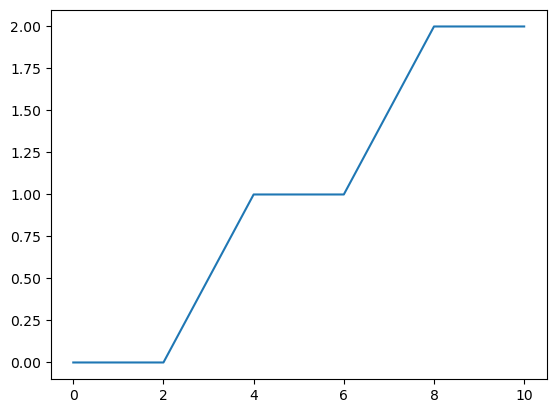

In [5]:
oracle_hist = np.array([bt_oracle(x, xp) for x, xp, _ in history])
reverse_hist = np.array([bt_oracle(xp, x) for x, xp, _ in history])
sigmoid_regret = -np.array([0.5 - torch.sigmoid(ackley(x)) for x, *_ in history]).cumsum()
dueling_regret = (oracle_hist + reverse_hist - 1)/2
plt.plot(dueling_regret.cumsum())

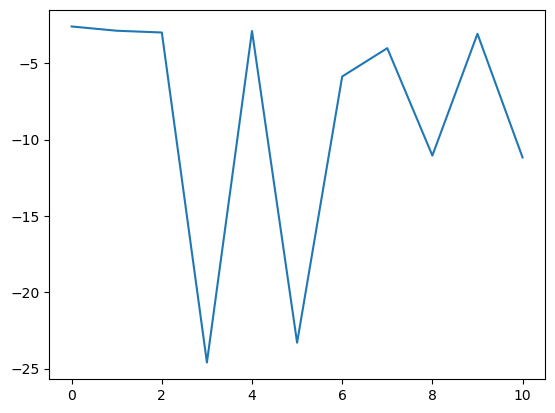

In [6]:
evals = np.array([square(x).item() for x, *_ in history])
plt.plot(evals)

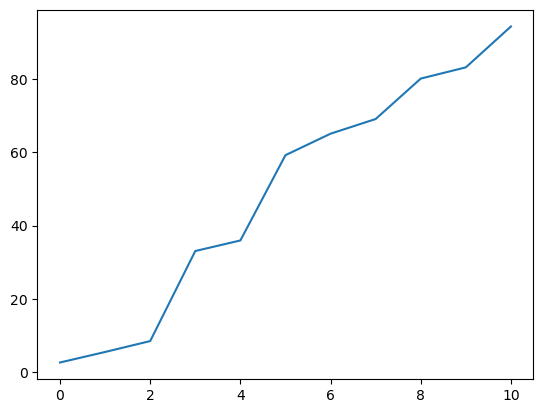

In [7]:
plt.plot(np.abs(evals).cumsum())